In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Airlines=pd.read_csv("Airlines+Data - Sheet1.csv")
Airlines.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [3]:
Airlines.shape

(96, 2)

In [5]:
Airlines['months']= 0

In [32]:
for i in range(96):
    p = Airlines["Month"][i]
    Airlines['months'][i]= p[0:3]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
month_dummies = pd.DataFrame(pd.get_dummies(Airlines['months']))

In [53]:
Airlines1 = pd.concat([Airlines,month_dummies],axis = 1)
Airlines1.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
Airlines1["t"] = np.arange(1,97)
Airlines1.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5


In [36]:
Airlines1["t_squared"] = Airlines1["t"]*Airlines1["t"]
Airlines1.columns
Airlines1.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25


In [37]:
Airlines1["log_Passengers"] = np.log(Airlines1["Passengers"])
Airlines1.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [38]:
Train = Airlines1.head(40)
Test = Airlines1.tail(20)

In [39]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

69.79051540362343

In [40]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

45.16382890638594

In [41]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

55.42502233366086

In [42]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

170.66882831476096

In [43]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

75.92496403624602

In [44]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

172.02281536653015

In [45]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

19.712951179965515

In [46]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,69.790515
1,rmse_Exp,45.163829
2,rmse_Quad,55.425022
3,rmse_add_sea,170.668828
4,rmse_add_sea_quad,75.924964
5,rmse_Mult_sea,172.022815
6,rmse_Mult_add_sea,19.712951


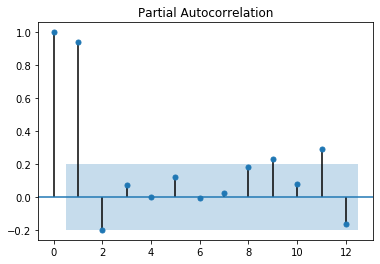

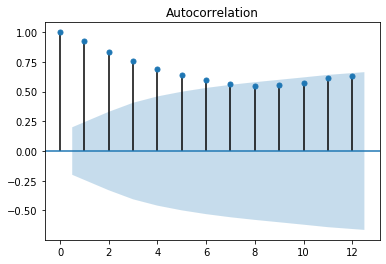

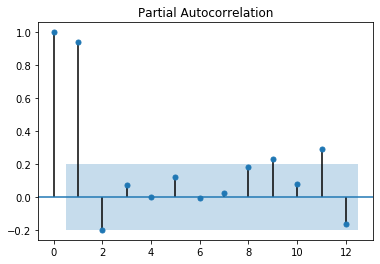

In [47]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Airlines1.Passengers,lags=12)
tsa_plots.plot_pacf(Airlines1.Passengers,lags=12)

In [48]:
Airlines1.set_index('Month',inplace=True)

In [49]:
Airlines1.head()

,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
Month,,,,,,,,,,,,,,,,,
Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


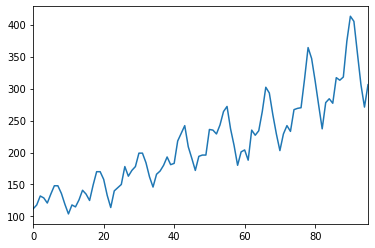

In [58]:
Airlines1['Passengers'].plot()

In [51]:
from statsmodels.tsa.arima_model import ARIMA
model1=ARIMA(Airlines.Passengers,order=(3,1,7)).fit(disp=0)

model1.aic


840.2500471713095

In [54]:
model2=ARIMA(Airlines.Passengers,order=(3,1,8)).fit(disp=0)
model2.aic

828.1866870359268

In [55]:
p=1
q=0
d=1
pdq=[]
aic=[]
for q in range(14):
    try:
        model=ARIMA(Airlines.Passengers,order=(p,d,q)).fit(disp=0)

        x=model.aic

        x1= p,d,q
               
        aic.append(x)
        pdq.append(x1)
    except:
        pass
            
keys = pdq
values = aic
d = dict(zip(keys, values))
print (d)


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


{(1, 1, 0): 867.2830878043574, (1, 1, 1): 863.626747243673, (1, 1, 2): 845.816965291853, (1, 1, 3): 847.7744709882516, (1, 1, 4): 842.7041753371439, (1, 1, 5): 840.4755946926844, (1, 1, 6): 843.414039471091, (1, 1, 7): 842.8778320121642, (1, 1, 8): 831.9459116245241, (1, 1, 9): 831.3783958661832, (1, 1, 10): 820.8767929805281, (1, 1, 11): 825.597628545032}


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
